In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
dataset_path = url = "https://github.com/MuhammadYaseenKhan/Urdu-Sentiment-Corpus/blob/master/urdu-sentiment-corpus-v1.tsv"
df = pd.read_csv(url, sep='\t')

df

,Tweet,Class
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N
2,ٹویٹر کا خیال کیسے آیا ؟,O
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",P
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,P
...,...,...
995,اُس آدمی نے اِس سالار کو کافی معقول ٹپ دی ہے ۔,P
996,چچا غالب کی روح سے معذرت کے ساتھہم نے مانا کہ ...,P
997,واہ جناب واہ! اچھی رہی۔ جناب خود کو فرشتہ سمجو...,P
998,اسلام آباد :پی اے ٹی کا دھرنا ختم، صفائی کے کا...,P


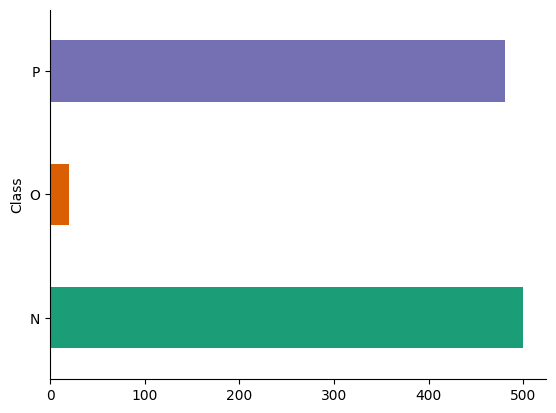

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Question 1**

# **LSTM**

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

def train_and_evaluate_lstm_models(X_train, X_test, y_train, y_test, max_combinations=4):
    # Load and preprocess the dataset
    df = pd.read_csv(dataset_path, sep='\t').dropna()
    class_mapping = {'P': 0, 'N': 1, 'O': 2}
    df['Class'] = df['Class'].map(class_mapping)
    X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Class'], test_size=0.25, random_state=42)

    # Tokenize the text data
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)
    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_test_seq = tokenizer.texts_to_sequences(X_test)
    max_sequence_length = 100
    X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
    X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

    # Define hyperparameters to try
    num_layers_values = [2, 3]
    dropout_rate_values = [0.3, 0.7]
    lstm_units_values = [64, 128]
    embedding_dim_values = [25, 50]

    # Dictionary to store results
    results = {}

    # Iterate over hyperparameters
    for num_layers in num_layers_values:
        for dropout_rate in dropout_rate_values:
            for lstm_units in lstm_units_values:
                for embedding_dim in embedding_dim_values:
                    print(f"Training model with {num_layers} layers, dropout rate {dropout_rate}, LSTM units {lstm_units}, and embedding dimension {embedding_dim}...")
                    # Build the LSTM model
                    model = Sequential([
                        Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, input_length=max_sequence_length),
                        *[LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True) for _ in range(num_layers - 1)],
                        LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate),
                        Dense(units=3, activation='softmax')
                    ])
                    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                    history = model.fit(X_train_padded, y_train, epochs=20, batch_size=32, verbose=0, validation_split=0.2)
                    y_pred_prob = model.predict(X_test_padded)
                    y_pred = y_pred_prob.argmax(axis=1)
                    accuracy = accuracy_score(y_test, y_pred)
                    precision = precision_score(y_test, y_pred, average='weighted')
                    recall = recall_score(y_test, y_pred, average='weighted')
                    f1 = f1_score(y_test, y_pred, average='weighted')
                    # Store results
                    results[(num_layers, dropout_rate, lstm_units, embedding_dim)] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

                    # Check if maximum combinations reached
                    if len(results) >= max_combinations:
                        return results
    # Return results
    return results


# **RNN**

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

def train_and_evaluate_rnn_models(dataset_path, max_combinations=4):
    # Load and preprocess the dataset
    df = pd.read_csv(dataset_path, sep='\t').dropna()
    class_mapping = {'P': 0, 'N': 1, 'O': 2}
    df['Class'] = df['Class'].map(class_mapping)
    X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Class'], test_size=0.25, random_state=42)

    # Tokenize the text data
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)
    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_test_seq = tokenizer.texts_to_sequences(X_test)
    max_sequence_length = 100
    X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
    X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

    # Define hyperparameters to try
    num_layers_values = [2, 3]
    dropout_rate_values = [0.3, 0.7]
    rnn_units_values = [64, 128]
    embedding_dim_values = [25, 50]

    # Dictionary to store results
    results = {}

    # Iterate over hyperparameters
    for num_layers in num_layers_values:
        for dropout_rate in dropout_rate_values:
            for rnn_units in rnn_units_values:
                for embedding_dim in embedding_dim_values:
                    print(f"Training model with {num_layers} layers, dropout rate {dropout_rate}, RNN units {rnn_units}, and embedding dimension {embedding_dim}...")
                    # Build the RNN model
                    model = Sequential([
                        Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, input_length=max_sequence_length),
                        *[SimpleRNN(units=rnn_units, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True) for _ in range(num_layers - 1)],
                        SimpleRNN(units=rnn_units, dropout=dropout_rate, recurrent_dropout=dropout_rate),
                        Dense(units=3, activation='softmax')
                    ])
                    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                    history = model.fit(X_train_padded, y_train, epochs=20, batch_size=32, verbose=0, validation_split=0.2)
                    y_pred_prob = model.predict(X_test_padded)
                    y_pred = y_pred_prob.argmax(axis=1)
                    accuracy = accuracy_score(y_test, y_pred)
                    precision = precision_score(y_test, y_pred, average='weighted')
                    recall = recall_score(y_test, y_pred, average='weighted')
                    f1 = f1_score(y_test, y_pred, average='weighted')
                    # Store results
                    results[(num_layers, dropout_rate, rnn_units, embedding_dim)] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

                    # Check if maximum combinations reached
                    if len(results) >= max_combinations:
                        return results

    return results


# **GRU**

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

def train_and_evaluate_gru_models(X_train, X_test, y_train, y_test, max_combinations=4):
    # Load and preprocess the dataset
    df = pd.read_csv(dataset_path, sep='\t').dropna()
    class_mapping = {'P': 0, 'N': 1, 'O': 2}
    df['Class'] = df['Class'].map(class_mapping)
    X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Class'], test_size=0.25, random_state=42)

    # Tokenize the text data
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)
    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_test_seq = tokenizer.texts_to_sequences(X_test)
    max_sequence_length = 100
    X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
    X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

    # Define hyperparameters to try
    num_layers_values = [2, 3]
    dropout_rate_values = [0.3, 0.7]
    gru_units_values = [64, 128]
    embedding_dim_values = [25, 50]

    # Dictionary to store results
    results = {}

    # Iterate over hyperparameters
    for num_layers in num_layers_values:
        for dropout_rate in dropout_rate_values:
            for gru_units in gru_units_values:
                for embedding_dim in embedding_dim_values:
                    print(f"Training model with {num_layers} layers, dropout rate {dropout_rate}, GRU units {gru_units}, and embedding dimension {embedding_dim}...")
                    # Build the GRU model
                    model = Sequential()
                    model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, input_length=max_sequence_length))
                    for _ in range(num_layers - 1):
                        model.add(GRU(units=gru_units, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True))
                    model.add(GRU(units=gru_units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
                    model.add(Dense(units=3, activation='softmax'))  # 3 output units for 3 classes

                    # Compile the model
                    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                    # Train the model with early stopping
                    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
                    history = model.fit(X_train_padded, y_train, epochs=20, batch_size=32, verbose=0, validation_split=0.2, callbacks=[early_stopping])

                    # Evaluate the model
                    y_pred_prob = model.predict(X_test_padded)
                    y_pred = y_pred_prob.argmax(axis=1)
                    accuracy = accuracy_score(y_test, y_pred)
                    precision = precision_score(y_test, y_pred, average='weighted')
                    recall = recall_score(y_test, y_pred, average='weighted')
                    f1 = f1_score(y_test, y_pred, average='weighted')

                    # Store results
                    results[(num_layers, dropout_rate, gru_units, embedding_dim)] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

                    # Check if maximum combinations reached
                    if len(results) >= max_combinations:
                        return results

    # Return results
    return results



# **BI-LSTM**

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

def train_and_evaluate_bilstm_models(X_train, X_test, y_train, y_test, max_combinations=4):
    # Load and preprocess the dataset
    df = pd.read_csv(dataset_path, sep='\t').dropna()
    class_mapping = {'P': 0, 'N': 1, 'O': 2}
    df['Class'] = df['Class'].map(class_mapping)
    X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Class'], test_size=0.25, random_state=42)

    # Tokenize the text data
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)
    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_test_seq = tokenizer.texts_to_sequences(X_test)
    max_sequence_length = 100
    X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
    X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

    # Define hyperparameters to try
    num_layers_values = [2, 3]
    dropout_rate_values = [0.3, 0.7]
    lstm_units_values = [64, 128]  # Reduce LSTM units
    embedding_dim_values = [25, 50]  # Reduce embedding dimension

    # Dictionary to store results
    results = {}

    # Iterate over hyperparameters
    for num_layers in num_layers_values:
        for dropout_rate in dropout_rate_values:
            for lstm_units in lstm_units_values:
                for embedding_dim in embedding_dim_values:
                    print(f"Training model with {num_layers} layers, dropout rate {dropout_rate}, LSTM units {lstm_units}, and embedding dimension {embedding_dim}...")
                    # Build the BiLSTM model
                    model = Sequential()
                    model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, input_length=max_sequence_length))
                    for _ in range(num_layers - 1):
                        model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True)))
                    model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate)))
                    model.add(Dense(units=3, activation='softmax'))  # 3 output units for 3 classes

                    # Compile the model
                    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                    # Train the model with early stopping
                    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
                    history = model.fit(X_train_padded, y_train, epochs=20, batch_size=32, verbose=0, validation_split=0.2, callbacks=[early_stopping])

                    # Evaluate the model
                    y_pred_prob = model.predict(X_test_padded)
                    y_pred = y_pred_prob.argmax(axis=1)
                    accuracy = accuracy_score(y_test, y_pred)
                    precision = precision_score(y_test, y_pred, average='weighted')
                    recall = recall_score(y_test, y_pred, average='weighted')
                    f1 = f1_score(y_test, y_pred, average='weighted')

                    # Store results
                    results[(num_layers, dropout_rate, lstm_units, embedding_dim)] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

                    # Check if maximum combinations reached
                    if len(results) >= max_combinations:
                        return results

    # Return results
    return results



In [ ]:
def main():
    dataset_path = "urdu-sentiment-corpus-v1.tsv"
    X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Class'], test_size=0.25, random_state=42)
    try:
        results_rnn = train_and_evaluate_rnn_models(dataset_path)
        assert results_rnn is not None
        print("\nRNN Results:")
        print_results(results_rnn)
    except AssertionError:
        print("RNN model failed. Moving to the next model.")

    try:
        results_bilstm = train_and_evaluate_bilstm_models(X_train, X_test, y_train, y_test)
        assert results_bilstm is not None
        print("\nBiLSTM Results:")
        print_results(results_bilstm)
    except AssertionError:
        print("BiLSTM model failed. Moving to the next model.")

    try:
        results_gru = train_and_evaluate_gru_models(dataset_path)
        assert results_gru is not None
        print("\nGRU Results:")
        print_results(results_gru)
    except AssertionError:
        print("GRU model failed.")

    try:
        results_lstm = train_and_evaluate_lstm_models(X_train, X_test, y_train, y_test)
        assert results_lstm is not None
        print("\nLSTM Results:")
        print_results(results_lstm)
    except AssertionError:
        print("LSTM model failed.")

def print_results(results):
    print("Number of Layers\tDropout Rate\tUnits\tEmbedding Dimension\tAccuracy\tPrecision\tRecall\tF1-Score")
    for key, value in results.items():
        print(f"{key[0]}\t\t\t{key[1]}\t\t{key[2]}\t{key[3]}\t\t\t{value['Accuracy']:.4f}\t\t{value['Precision']:.4f}\t\t{value['Recall']:.4f}\t\t{value['F1-Score']:.4f}")

if __name__ == "__main__":
    main()


# **Question 2**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from gensim.models import FastText

# Load the dataset
url = "urdu-sentiment-corpus-v1.tsv"
df = pd.read_csv(url, sep='\t')

# Replace class labels with numerical values
class_mapping = {'P': 0, 'N': 1, 'O': 2}
df['Class'] = df['Class'].map(class_mapping)

# Drop rows with missing values
df.dropna(inplace=True)

# Split data into input (X) and target (y) variables
X = df['Tweet']
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text data to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_sequence_length = 100  # Adjust this value according to your data
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Train FastText embeddings
print("Training FastText embeddings...")
fasttext_model = FastText(sentences=X, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Create embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, fasttext_model.wv.vector_size))
for word, i in tokenizer.word_index.items():
    if word in fasttext_model.wv:
        embedding_matrix[i] = fasttext_model.wv[word]

# Define hyperparameters
num_layers = 2
dropout_rate = 0.3
lstm_units = 64

# Build the BiLSTM model with FastText embeddings
print("Building BiLSTM model with FastText embeddings...")
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=fasttext_model.wv.vector_size, input_length=max_sequence_length, weights=[embedding_matrix], trainable=True))
for _ in range(num_layers - 1):
    model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True)))
model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate)))
model.add(Dense(units=3, activation='softmax'))  # 3 output units for 3 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
print("Training BiLSTM model with FastText embeddings...")
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train_padded, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
print("Evaluating BiLSTM model with FastText embeddings...")
y_pred_prob = model.predict(X_test_padded)
y_pred = y_pred_prob.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Store results
rf = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

# Print results
print("Results with BiLSTM and FastText embeddings:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Training FastText embeddings...


Building BiLSTM model with FastText embeddings...


Training BiLSTM model with FastText embeddings...
Epoch 1/20
19/19 [==============================] - 40s 1s/step - loss: 0.9127 - accuracy: 0.4825 - val_loss: 0.7355 - val_accuracy: 0.5200
Epoch 2/20
19/19 [==============================] - 26s 1s/step - loss: 0.7925 - accuracy: 0.4925 - val_loss: 0.7554 - val_accuracy: 0.4733
Epoch 3/20
19/19 [==============================] - 33s 2s/step - loss: 0.7258 - accuracy: 0.5776 - val_loss: 0.7434 - val_accuracy: 0.5600
Epoch 4/20
19/19 [==============================] - 28s 1s/step - loss: 0.3151 - accuracy: 0.9065 - val_loss: 1.1514 - val_accuracy: 0.5267
Evaluating BiLSTM model with FastText embeddings...
8/8 [==============================] - 2s 111ms/step
Results with BiLSTM and FastText embeddings:
Accuracy: 0.64
Precision: 0.625723602484472
Recall: 0.64
F1-Score: 0.6310632478632479


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from gensim.models import FastText

def train_evaluate_fasttext_bilstm(url, max_sequence_length=100, num_layers=2, dropout_rate=0.3, lstm_units=64, epochs=20, batch_size=32, validation_split=0.2, patience=3):
    # Load the dataset
    df = pd.read_csv(url, sep='\t')

    # Replace class labels with numerical values
    class_mapping = {'P': 0, 'N': 1, 'O': 2}
    df['Class'] = df['Class'].map(class_mapping)

    # Drop rows with missing values
    df.dropna(inplace=True)

    # Split data into input (X) and target (y) variables
    X = df['Tweet']
    y = df['Class']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Tokenize the text data
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)

    # Convert text data to sequences of integers
    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_test_seq = tokenizer.texts_to_sequences(X_test)

    # Pad sequences
    X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
    X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

    # Train FastText embeddings
    print("Training FastText embeddings...")
    fasttext_model = FastText(sentences=X, vector_size=100, window=5, min_count=1, workers=4, sg=1)

    # Create embedding matrix
    embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, fasttext_model.wv.vector_size))
    for word, i in tokenizer.word_index.items():
        if word in fasttext_model.wv:
            embedding_matrix[i] = fasttext_model.wv[word]

    # Build the BiLSTM model with FastText embeddings
    print("Building BiLSTM model with FastText embeddings...")
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=fasttext_model.wv.vector_size, input_length=max_sequence_length, weights=[embedding_matrix], trainable=True))
    for _ in range(num_layers - 1):
        model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True)))
    model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate)))
    model.add(Dense(units=3, activation='softmax'))  # 3 output units for 3 classes

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model with early stopping
    print("Training BiLSTM model with FastText embeddings...")
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    history = model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=validation_split, callbacks=[early_stopping])

    # Evaluate the model
    print("Evaluating BiLSTM model with FastText embeddings...")
    y_pred_prob = model.predict(X_test_padded)
    y_pred = y_pred_prob.argmax(axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

    return results


In [ ]:
def train_evaluate_word2vec_bilstm(url, max_sequence_length=100, num_layers=2, dropout_rate=0.3, lstm_units=64, epochs=20, batch_size=32, validation_split=0.2, patience=3):
    import pandas as pd
    import numpy as np
    import tensorflow as tf
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
    from gensim.models import Word2Vec

    # Load the dataset
    df = pd.read_csv(url, sep='\t')

    # Replace class labels with numerical values
    class_mapping = {'P': 0, 'N': 1, 'O': 2}
    df['Class'] = df['Class'].map(class_mapping)

    # Drop rows with missing values
    df.dropna(inplace=True)

    # Split data into input (X) and target (y) variables
    X = df['Tweet']
    y = df['Class']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Tokenize the text data
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)

    # Convert text data to sequences of integers
    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_test_seq = tokenizer.texts_to_sequences(X_test)

    # Pad sequences
    X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
    X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

    # Train Word2Vec embeddings
    print("Training Word2Vec embeddings...")
    word2vec_model = Word2Vec(sentences=X, vector_size=100, window=5, min_count=1, workers=4, sg=1)

    # Create embedding matrix
    embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, word2vec_model.wv.vector_size))
    for word, i in tokenizer.word_index.items():
        if word in word2vec_model.wv:
            embedding_matrix[i] = word2vec_model.wv[word]

    # Build the BiLSTM model with Word2Vec embeddings
    print("Building BiLSTM model with Word2Vec embeddings...")
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=word2vec_model.wv.vector_size, input_length=max_sequence_length, weights=[embedding_matrix], trainable=True))
    for _ in range(num_layers - 1):
        model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True)))
    model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate)))
    model.add(Dense(units=3, activation='softmax'))  # 3 output units for 3 classes

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model with early stopping
    print("Training BiLSTM model with Word2Vec embeddings...")
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    history = model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=validation_split, callbacks=[early_stopping])

    # Evaluate the model
    print("Evaluating BiLSTM model with Word2Vec embeddings...")
    y_pred_prob = model.predict(X_test_padded)
    y_pred = y_pred_prob.argmax(axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

    return results


In [ ]:
def train_evaluate_bilstm_without_pretrained_embeddings(url, max_sequence_length=100, num_layers=2, dropout_rate=0.3, lstm_units=64, epochs=20, batch_size=32, validation_split=0.2, patience=3):
    import pandas as pd
    import numpy as np
    import tensorflow as tf
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

    # Load the dataset
    df = pd.read_csv(url, sep='\t')

    # Replace class labels with numerical values
    class_mapping = {'P': 0, 'N': 1, 'O': 2}
    df['Class'] = df['Class'].map(class_mapping)

    # Drop rows with missing values
    df.dropna(inplace=True)

    # Split data into input (X) and target (y) variables
    X = df['Tweet']
    y = df['Class']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Tokenize the text data
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)

    # Convert text data to sequences of integers
    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_test_seq = tokenizer.texts_to_sequences(X_test)

    # Pad sequences
    X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
    X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

    # Build the BiLSTM model without pre-trained embeddings
    print("Building BiLSTM model without pre-trained embeddings...")
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))  # Add this line to keep consistency in the indexing
    for _ in range(num_layers - 1):
        model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True)))
    model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate)))
    model.add(Dense(units=3, activation='softmax'))  # 3 output units for 3 classes

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model with early stopping
    print("Training BiLSTM model without pre-trained embeddings...")
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    history = model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=validation_split, callbacks=[early_stopping])

    # Evaluate the model
    print("Evaluating BiLSTM model without pre-trained embeddings...")
    y_pred_prob = model.predict(X_test_padded)
    y_pred = y_pred_prob.argmax(axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

    return results


In [ ]:
def train_evaluate_bilstm_with_glove_embeddings(url, max_sequence_length=100, num_layers=2, dropout_rate=0.3, lstm_units=64, epochs=20, batch_size=32, validation_split=0.2, patience=3):
    import pandas as pd
    import numpy as np
    import tensorflow as tf
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
    import gensim.downloader as api

    # Load the dataset
    df = pd.read_csv(url, sep='\t')

    # Replace class labels with numerical values
    class_mapping = {'P': 0, 'N': 1, 'O': 2}
    df['Class'] = df['Class'].map(class_mapping)

    # Drop rows with missing values
    df.dropna(inplace=True)

    # Split data into input (X) and target (y) variables
    X = df['Tweet']
    y = df['Class']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Tokenize the text data
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)

    # Convert text data to sequences of integers
    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_test_seq = tokenizer.texts_to_sequences(X_test)

    # Pad sequences
    X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
    X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

    # Download and load pre-trained GloVe embeddings
    glove_model = api.load('glove-wiki-gigaword-100')

    # Create embedding matrix
    embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, glove_model.vector_size))
    for word, i in tokenizer.word_index.items():
        if word in glove_model:
            embedding_matrix[i] = glove_model[word]

    # Build the BiLSTM model with GloVe embeddings
    print("Building BiLSTM model with GloVe embeddings...")
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=glove_model.vector_size, input_length=max_sequence_length, weights=[embedding_matrix], trainable=True))
    for _ in range(num_layers - 1):
        model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True)))
    model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate)))
    model.add(Dense(units=3, activation='softmax'))  # 3 output units for 3 classes

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model with early stopping
    print("Training BiLSTM model with GloVe embeddings...")
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    history = model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=validation_split, callbacks=[early_stopping])

    # Evaluate the model
    print("Evaluating BiLSTM model with GloVe embeddings...")
    y_pred_prob = model.predict(X_test_padded)
    y_pred = y_pred_prob.argmax(axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

    return results


In [ ]:
def main():
    # Define URLs for dataset
    url = "urdu-sentiment-corpus-v1.tsv"

    # Test train_evaluate_bilstm_with_glove_embeddings function
    print("Testing train_evaluate_bilstm_with_glove_embeddings function...")
    try:
        rg_results = train_evaluate_bilstm_with_glove_embeddings(url)
        print("Results with BiLSTM and GloVe embeddings:")
        print("Accuracy:", rg_results['Accuracy'])
        print("Precision:", rg_results['Precision'])
        print("Recall:", rg_results['Recall'])
        print("F1-Score:", rg_results['F1-Score'])
        print()
    except Exception as e:
        print("Error occurred while testing train_evaluate_bilstm_with_glove_embeddings:", e)
        print()

    # Test train_evaluate_bilstm_with_fasttext_embeddings function
    print("Testing train_evaluate_bilstm_with_fasttext_embeddings function...")
    try:
        rw_results = train_evaluate_bilstm_with_fasttext_embeddings(url)
        print("Results with BiLSTM and FastText embeddings:")
        print("Accuracy:", rw_results['Accuracy'])
        print("Precision:", rw_results['Precision'])
        print("Recall:", rw_results['Recall'])
        print("F1-Score:", rw_results['F1-Score'])
        print()
    except Exception as e:
        print("Error occurred while testing train_evaluate_bilstm_with_fasttext_embeddings:", e)
        print()

    # Test train_evaluate_bilstm_without_pretrained_embeddings function
    print("Testing train_evaluate_bilstm_without_pretrained_embeddings function...")
    try:
        rn_results = train_evaluate_bilstm_without_pretrained_embeddings(url)
        print("Results with BiLSTM without pre-trained embeddings:")
        print("Accuracy:", rn_results['Accuracy'])
        print("Precision:", rn_results['Precision'])
        print("Recall:", rn_results['Recall'])
        print("F1-Score:", rn_results['F1-Score'])
        print()
    except Exception as e:
        print("Error occurred while testing train_evaluate_bilstm_without_pretrained_embeddings:", e)
        print()


if __name__ == "__main__":
    main()
